In [3]:
# Connect to Elastic Cloud
from elasticsearch import Elasticsearch
from elasticsearch import helpers
import urllib3
urllib3.disable_warnings()


es = Elasticsearch(
    ['https://86dd17d952698a0f90485f28a0087669.eu-west-1.aws.found.io'],
    port=9243,
    http_auth='elastic:9X4hmUZXasOBuF49ujcGBqLS',
    verify_certs=False
)

es.count(index='events', doc_type='batch2')

/root/workspace/anaconda2/lib/python2.7/site-packages/elasticsearch/connection/http_urllib3.py:90: UserWarning: Connecting to 86dd17d952698a0f90485f28a0087669.eu-west-1.aws.found.io using SSL with verify_certs=False is insecure.
  'Connecting to %s using SSL with verify_certs=False is insecure.' % host)


{u'_shards': {u'failed': 0, u'successful': 5, u'total': 5}, u'count': 2000000}

In [4]:
from __future__ import print_function

gen = helpers.scan(es,
    query={"query": {"match_all": {}}},
    index="events",
    doc_type="batch2"
)

# Get all filesize
i = 0
filesizes = []
for event in gen:
    if i % 10000 == 0:
            print('.', end='')
    i += 1
    #print(event)
    filesizes.append(int(event['_source']['bytes']))
print("Done!")

........................................................................................................................................................................................................Done!


/root/workspace/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


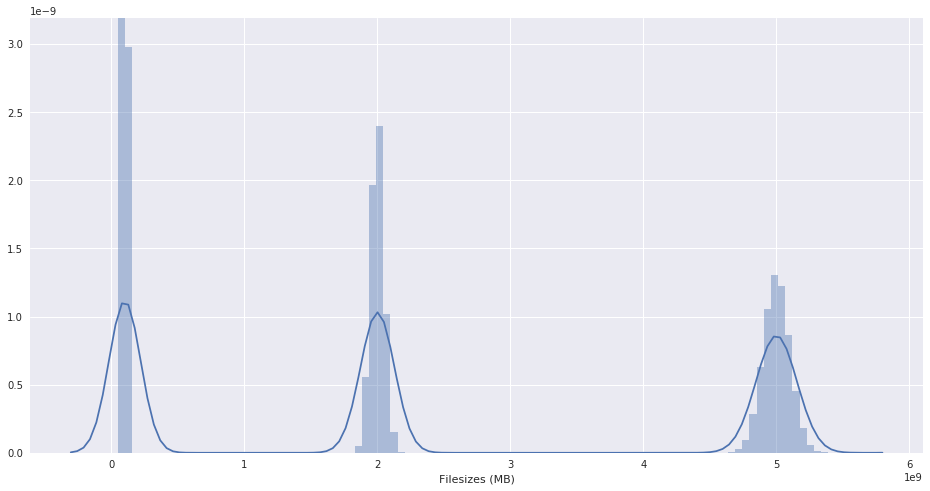

In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np
sns.set(rc={"figure.figsize": (16, 8)})
ax = sns.distplot(filesizes, bins=100, kde=True, rug=False)
ax.set_xlabel("Filesizes (MB)")

In [18]:
gen = helpers.scan(es,
    query={"query": {"match_all": {}}},
    index="events",
    doc_type="batch2"
)

dc = np.zeros((5,5), dtype=np.int)
dc_filesize = np.zeros((5,5), dtype=np.int)

data_centres = ["data centre a",
                "data centre b",
                "data centre c",
                "data centre d",
                "data centre e"]
data_centres.index("data centre d")

# Get all filesize
i = 0
event_types = [0,0,0]
event_types_names = []
for event in gen:
    if i % 10000 == 0:
            print('.', end='')
    i += 1
    #print(event)
    src = data_centres.index(event['_source']['src_site'])
    dst = data_centres.index(event['_source']['dst_site'])
    
    if event['_source']['event_type'] == 'transfer-success':
        dc[src][dst] += 1
        dc_filesize[src][dst] += event['_source']['bytes']

print("Done!")

........................................................................................................................................................................................................Done!


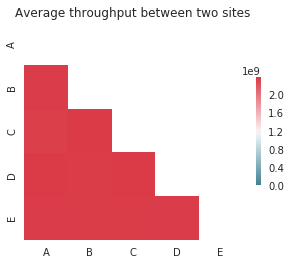

In [51]:
import pandas as pd
from string import letters
sns.set(style="white")

dc[dc==0] += 1
avg_throughput = dc_filesize / dc.astype(float)
hmap = pd.DataFrame(data=avg_throughput.astype(int),
                    columns=list(letters[:5]))

# Generate a mask for the upper triangle
mask = np.zeros_like(avg_throughput, dtype=np.bool)
mask[np.triu_indices_from(avg_throughput)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 4))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(hmap, mask=mask, cmap=cmap,
            square=True, xticklabels=True, yticklabels=list(letters[:5]),
            cbar_kws={"shrink": .5}, ax=ax)
plt.title("Average throughput between two sites")